# CBP Monthly Encounters

Data taken from the Office of Homeland Security Statistics (OHSS)'s [CBP Encounters](https://ohss.dhs.gov/khsm/cbp-encounters) page on September 30, 2025 (file "CBP Encounters - USBP - November 2024").

Note that dates in this file use a fiscal year. The federal fiscal year runs October 1 through September 30. This means that October 1, 2024 (which is in this dataset) appears as year `FY2025` and month `01 October` (i.e. the first month of FY2025).

In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.io as pio

# Don't want to duplicate the variable here, and this seems to be the prefered way to import something
# when you're not dealing with a "proper" package (which notebooks are not)
import sys

sys.path.append("..")
from backend import colorblind_palette

# Allows plotly plots to render interactively locally, but as static images when viewed in github.
# Without this the plotly images simply do not render in github.
pio.renderers.default = "vscode+png"

# Read in data and rename columns for convenience.
df = pd.read_excel("KHSM Encounters (USBP) fy25m11.xlsx", sheet_name="Monthly Region")
df = df.rename(columns={"Fiscal\nYear": "FiscalYear"})
df.head()

2025-09-30 15:37:29.476 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


,FiscalYear,Month,Region,Quantity
0,2000,01 October,Coastal Border,740
1,2000,01 October,Northern Land Border,1250
2,2000,01 October,Southwest Land Border,87820
3,2000,02 November,Coastal Border,500
4,2000,02 November,Northern Land Border,960


In [2]:
# Create a FiscalDate column that is a datetime object that is a combination of the FiscalYear and Month columns.
df.Month = df.Month.str.split().str[1]  # Convert "01 October" to just "October"
df["FiscalDate"] = df.FiscalYear.astype(str) + " " + df.Month
df.FiscalDate = pd.to_datetime(df.FiscalDate, format="%Y %B")  # Day defaults to 1

df.head()

,FiscalYear,Month,Region,Quantity,FiscalDate
0,2000,October,Coastal Border,740,2000-10-01
1,2000,October,Northern Land Border,1250,2000-10-01
2,2000,October,Southwest Land Border,87820,2000-10-01
3,2000,November,Coastal Border,500,2000-11-01
4,2000,November,Northern Land Border,960,2000-11-01


In [3]:
# Create a Date column that is the calendar date. This means that months >= October
# need to have 1 subtracted from the year
def convert_fiscal_date_to_calendar_date(fiscal_date):
    if fiscal_date.month >= 10:
        return datetime(fiscal_date.year - 1, fiscal_date.month, fiscal_date.day)
    else:
        return fiscal_date


df["Date"] = df.FiscalDate.apply(convert_fiscal_date_to_calendar_date)
df.head()

,FiscalYear,Month,Region,Quantity,FiscalDate,Date
0,2000,October,Coastal Border,740,2000-10-01,1999-10-01
1,2000,October,Northern Land Border,1250,2000-10-01,1999-10-01
2,2000,October,Southwest Land Border,87820,2000-10-01,1999-10-01
3,2000,November,Coastal Border,500,2000-11-01,1999-11-01
4,2000,November,Northern Land Border,960,2000-11-01,1999-11-01


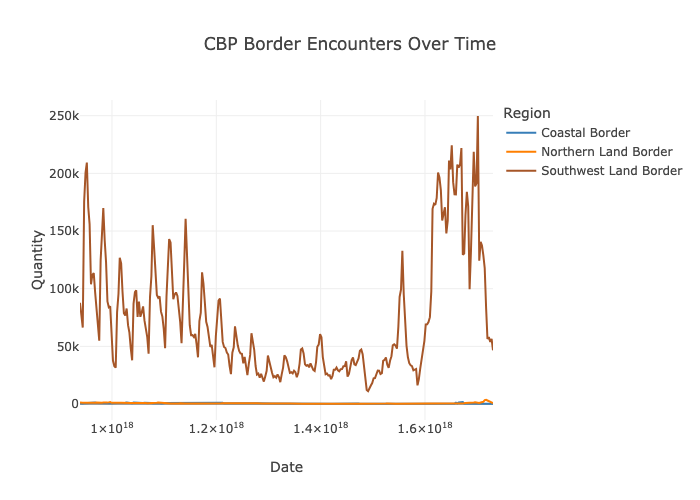

In [4]:
px.line(
    df,
    x="Date",
    y="Quantity",
    color="Region",
    title="CBP Border Encounters Over Time",
    color_discrete_sequence=colorblind_palette,
)